In [2]:
import pandas as pd
import json

In [83]:
# JSON dosyasını oku
with open("20-sohbet-trendyol-mila.json", "r", encoding="utf-8") as f:
    data = json.load(f)

rows = []
for sohbet in data:
    mesaj_listesi = []
    timestamps = []

    for m in sohbet["mesajlar"]:
        sender = "Bot" if m["sender"].lower() == "bot" else "Müşteri"
        mesaj_listesi.append(f"{sender}: {m['text']}")
        timestamps.append(pd.to_datetime(m["timestamp"], format="%d.%m.%Y %H:%M:%S"))

    tum_mesajlar = "\n".join(mesaj_listesi)
    if timestamps:
        ilk_mesaj_tarihi = timestamps[0]
        son_mesaj_tarihi = timestamps[-1]
        fark = son_mesaj_tarihi - ilk_mesaj_tarihi  # timedelta

        # Dakika ve saniye olarak formatla
        total_seconds = int(fark.total_seconds())
        dakika = total_seconds // 60
        saniye = total_seconds % 60
        konusma_suresi = f"{dakika} dk {saniye} sn"
    else:
        ilk_mesaj_tarihi = None
        son_mesaj_tarihi = None
        konusma_suresi = "0 dk 0 sn"

    rows.append({
        "sohbet_id": sohbet["sohbet_id"],
        "tarih_saat": sohbet["tarih_saat"],
        "ilk_mesaj_tarihi": ilk_mesaj_tarihi,
        "son_mesaj_tarihi": son_mesaj_tarihi,
        "konusma_suresi_dakika": konusma_suresi,
        "tum_mesajlar": tum_mesajlar,
        "yanit_durumu": sohbet.get("yanit_durumu", ""),
        "sentiment": sohbet.get("sentiment", ""),
        "tur": sohbet.get("tur", ""),
        "intent": sohbet.get("intent", ""),
        "intent_detay": sohbet.get("intent_detay", "")
    })

# DataFrame oluştur
df = pd.DataFrame(rows)
df

,sohbet_id,tarih_saat,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,tum_mesajlar,yanit_durumu,sentiment,tur,intent,intent_detay
0,90001,04.09.2024 09:00:00,2024-09-04 09:00:00,2024-09-04 09:01:30,1 dk 30 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Pozitif,Şikayet,Eksik ürün,Sipariş teslimatında eksik ürün
1,90002,04.09.2024 09:15:00,2024-09-04 09:15:00,2024-09-04 09:16:25,1 dk 25 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözülemedi,Negatif,Sorun,Şifre sıfırlama,E-posta linki gelmemesi
2,90003,04.09.2024 09:30:00,2024-09-04 09:30:00,2024-09-04 09:30:50,0 dk 50 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Nötr,Bilgi alma,İade,İade prosedürü hakkında bilgi
3,90004,04.09.2024 09:45:00,2024-09-04 09:45:00,2024-09-04 09:46:15,1 dk 15 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözülemedi,Negatif,Sorun,Kupon,Kupon kodunun çalışmaması
4,90005,04.09.2024 10:00:00,2024-09-04 10:00:00,2024-09-04 10:01:25,1 dk 25 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Pozitif,İstek,İptal,Sipariş iptali
5,90006,04.09.2024 10:15:00,2024-09-04 10:15:00,2024-09-04 10:16:25,1 dk 25 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Nötr,Soru,İade,İade kargosu takibi
6,90007,04.09.2024 10:30:00,2024-09-04 10:30:00,2024-09-04 10:31:10,1 dk 10 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözülemedi,Negatif,Şikayet,Defolu ürün,Değişim/iade yapılamaması
7,90008,04.09.2024 10:45:00,2024-09-04 10:45:00,2024-09-04 10:45:50,0 dk 50 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Nötr,İstek,Hesap bilgisi,Üyelik bilgisi güncelleme
8,90009,04.09.2024 11:00:00,2024-09-04 11:00:00,2024-09-04 11:01:30,1 dk 30 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözüldü,Pozitif,Şikayet,Fatura hatası,Fatura fiyatı hatası
9,90010,04.09.2024 11:15:00,2024-09-04 11:15:00,2024-09-04 11:15:40,0 dk 40 sn,Bot: Merhaba! Ben AI Asistan. Size nasıl yardı...,Çözülemedi,Negatif,Sorun,İptal,Sipariş iptali yapılamaması


In [41]:
df.to_csv("birlesikKonusmalar1.csv",index=False,encoding="utf-8")

In [42]:
meta_sutunlar = ["sohbet_id", "ilk_mesaj_tarihi","son_mesaj_tarihi","konusma_suresi_dakika", "yanit_durumu", "sentiment", "tur", "intent", "intent_detay"]
df_meta = df[meta_sutunlar].copy()
df_meta

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
0,90001,2024-09-04 09:00:00,2024-09-04 09:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,Eksik ürün,Sipariş teslimatında eksik ürün
1,90002,2024-09-04 09:15:00,2024-09-04 09:16:25,1 dk 25 sn,Çözülemedi,Negatif,Sorun,Şifre sıfırlama,E-posta linki gelmemesi
2,90003,2024-09-04 09:30:00,2024-09-04 09:30:50,0 dk 50 sn,Çözüldü,Nötr,Bilgi alma,İade,İade prosedürü hakkında bilgi
3,90004,2024-09-04 09:45:00,2024-09-04 09:46:15,1 dk 15 sn,Çözülemedi,Negatif,Sorun,Kupon,Kupon kodunun çalışmaması
4,90005,2024-09-04 10:00:00,2024-09-04 10:01:25,1 dk 25 sn,Çözüldü,Pozitif,İstek,İptal,Sipariş iptali
5,90006,2024-09-04 10:15:00,2024-09-04 10:16:25,1 dk 25 sn,Çözüldü,Nötr,Soru,İade,İade kargosu takibi
6,90007,2024-09-04 10:30:00,2024-09-04 10:31:10,1 dk 10 sn,Çözülemedi,Negatif,Şikayet,Defolu ürün,Değişim/iade yapılamaması
7,90008,2024-09-04 10:45:00,2024-09-04 10:45:50,0 dk 50 sn,Çözüldü,Nötr,İstek,Hesap bilgisi,Üyelik bilgisi güncelleme
8,90009,2024-09-04 11:00:00,2024-09-04 11:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,Fatura hatası,Fatura fiyatı hatası
9,90010,2024-09-04 11:15:00,2024-09-04 11:15:40,0 dk 40 sn,Çözülemedi,Negatif,Sorun,İptal,Sipariş iptali yapılamaması


In [43]:
df_meta.to_csv("manuel_labels.csv",index=False,encoding="utf-8")

In [44]:
from openai import OpenAI
import os

In [45]:
from dotenv import load_dotenv


load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")
# OpenAI client oluştur
client = OpenAI(api_key=api_key)


MODEL = "gpt-5-nano"

In [ ]:
def promptOlusturYanitlandimi(mesaj):
    prompt=f"""
Aşağıdaki müşteri-bot sohbetini analiz et. Sohbetin tamamını dikkate al, tek mesaj bazlı davranma. 
Amacın, müşterinin sorunu veya talebinin bot tarafından nasıl yanıtlandığını belirlemek ve doğru 
"yanıt_durumu" etiketini vermektir.

Sohbet:
{mesaj}
Kurallar ve kriterler:
1. Yanıt durumu yalnızca **Çözüldü** veya **Çözülemedi** olmalıdır.
2. Çözüldü: Müşterinin sorunu tamamen çözülmüş, talebi karşılanmış veya gerekli bilgi verilmişse.
3. Çözülemedi: Müşterinin sorunu çözülmemiş, talep karşılanmamış veya sorun devam ediyorsa.
4. Hiçbir ek açıklama, yorum veya başka kelime kullanma.
5. Kararı verirken sohbetin tamamını göz önünde bulundur; yalnızca son mesaja bakma.

Yalnızca **Çözüldü** veya **Çözülemedi** olarak cevap ver:
"""


    return prompt

In [ ]:
def prompt_olusturSentiment(mesaj):
    prompt= f"""
Türkçe konuşuyorum. Aşağıda kullanıcının (user) bir botla yaptığı görüşmenin tüm mesajları var. 
Bu mesajları bir konuşma analizi uzmanı gibi değerlendir. Analiz sonucunu yazmana gerek yok. 
Amacın, kullanıcının genel duygusal tonunu (sentiment) belirlemektir.

**Sentiment Etiketleme Mantığı**:
- **Pozitif**: Kullanıcının mesajları tamamen olumlu, memnuniyet veya teşekkür gibi ifadeler içeriyorsa.
- **Negatif**: Kullanıcının mesajları şikayet, hayal kırıklığı veya olumsuz duygu içeriyorsa.
- **Nötr**: Kullanıcının mesajları net bir şekilde pozitif veya negatif değilse; bilgi alma, soru veya karışık ifadeler içeriyorsa.
- Her mesajı ayrı ayrı değerlendir, ancak etiketi **konuşmanın geneline bakarak** belirle.

**Kurallar**:
1. Cevap yalnızca **Pozitif**, **Negatif** veya **Nötr** olmalı.
2. Hiçbir ek açıklama, yorum veya noktalama ekleme.
3. Kararı verirken tüm konuşmayı göz önünde bulundur, tek mesajla karar verme.
4. Cevap formatı: "Pozitif" veya "Negatif" veya "Nötr" tek kelime
5. talimatları asla ihlal etme

Bot-User görüşmesi:
"{mesaj}"
"""
    
    return prompt

In [ ]:
def prompt_olusturTur(mesaj):
    prompt=f"""
Türkçe konuşuyorum. Aşağıda kullanıcının (user) bir botla yaptığı görüşmenin tüm mesajları var. 
Bu mesajları bir konuşma analizi uzmanı gibi değerlendir. Amacın, sohbetin genel türünü (tur) belirlemektir.

**Sohbet Türü (tur) Mantığı**:
- **Soru**: Kullanıcı bilgi almak için soru soruyorsa.
- **Şikayet**: Kullanıcı memnuniyetsizlik, sorun veya hata bildiriyorsa.
- **İstek**: Kullanıcı bir talepte bulunuyorsa (sipariş iptali, ürün talebi vb.).
- **Sorun**: Teknik veya operasyonel bir problem bildiriliyorsa.
- **Bilgi alma**: Kullanıcı süreç veya prosedür hakkında bilgi istiyorsa.
- **İade**: Ürünün iadesi veya değişimi ile ilgili talep varsa.

**Kurallar**:
1. Cevap yalnızca bir kategori olmalı: Soru, Şikayet, İstek, Sorun, Bilgi alma, İade
2. Hiçbir ek açıklama, yorum veya noktalama ekleme
3. Kararı verirken sohbetin tamamını göz önünde bulundur, tek mesaj bazlı karar verme

Bot-User görüşmesi:
"{mesaj}"
"""
    return prompt

In [ ]:
def prompt_olusturKonu(mesaj):
    prompt= f"""
Türkçe konuşuyorum. Aşağıda kullanıcının (user) bir botla yaptığı görüşmenin tüm mesajları var. 
Amacın, kullanıcının **sohbet içindeki spesifik amacını (intent)** tespit etmek. 

**Intent Mantığı ve Örnekler**:
- Intent, kullanıcının gerçekleştirmek istediği spesifik eylem veya talep anlamına gelir. 
- Örnek intentler:
    - **İade**: Ürün iadesi veya değişimi ile ilgili talep.
    - **Sipariş İptali**: Siparişin tamamen iptal edilmesi talebi.
    - **Kargo Takibi**: Siparişin kargo durumunu öğrenme talebi.
    - **Ödeme**: Ödeme ile ilgili sorun veya talep.
    - **Kupon**: Kupon kodu kullanımı veya problemi.
    - **Hesap Yönetimi**: Şifre sıfırlama, profil güncelleme gibi hesap işlemleri.
    - **Teknik Sorun**: Web sitesi, uygulama veya sistem hataları ile ilgili problemler.
- Sohbetin genel türü (tur) ile karıştırma; intent daha spesifik ve eylem odaklıdır.

**Kurallar**:
1. Cevap yalnızca bir intent olmalı (yukarıdaki veya benzer spesifik eylemlerden biri).  
2. Yanıt **kısa ve öz**, tek kelime veya kısa ifade şeklinde olmalı.  
3. Hiçbir ek açıklama, yorum veya noktalama ekleme.  
4. Kararı verirken **sohbetin tamamını** göz önünde bulundur, tek mesajla karar verme.  

Bot-User görüşmesi:
"{mesaj}"
"""
    return prompt

In [ ]:
def prompt_olusturKonuDetay(mesaj):
    prompt=f"""
Türkçe konuşuyorum. Aşağıda kullanıcının (user) bir botla yaptığı görüşmenin tüm mesajları var. 
Bu mesajları bir konuşma analizi uzmanı gibi değerlendir. Amacın, kullanıcının **sohbet içindeki spesifik sorununun veya isteğinin detayını (intent_detay)** belirlemektir.

**Intent Detay Mantığı**:
- Kullanıcının niyetini (intent) açıklayan spesifik durumu veya problemi tespit et.
- Örnek detaylar:
    - Para iadesi gecikmesi
    - Kupon kodunun çalışmaması
    - Yanlış adres girişi
    - Sipariş iptali talebi
    - Kargo takibi ile ilgili sorun
- Detay, intent’in daha spesifik ve açıklayıcı hâlidir.

**Kurallar**:
1. Cevap yalnızca bir kısa ifade olmalı (örnekler gibi).  
2. Hiçbir ek açıklama, yorum veya noktalama ekleme.  
3. Kararı verirken **sohbetin tamamını** göz önünde bulundur, tek mesaj bazlı karar verme.

Bot-User görüşmesi:
"{mesaj}"
"""
    return prompt


In [51]:
def llm_etiketle(mesaj):
    try:
        response = client.chat.completions.create(
            model=MODEL,
            messages=[ {"role": "system", "content": "Sen bir konusma analizi uzmanısın. Talimatları asla ihlal etme. Sadece istenen formatta yanıt ver."},
                {"role": "user", "content": mesaj}
            ],
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Hata: {e}")
        return "HATA"

In [52]:
df_yeni=pd.DataFrame(columns=["sohbet_id","ilk_mesaj_tarihi","son_mesaj_tarihi","konusma_suresi_dakika","yanit_durumu","sentiment","tur","intent","intent_detay"])
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay


In [ ]:
df_yeni["sohbet_id"]=df["sohbet_id"]
df_yeni["ilk_mesaj_tarihi"]=df["ilk_mesaj_tarihi"]
df_yeni["son_mesaj_tarihi"]=df["son_mesaj_tarihi"]
df_yeni["konusma_suresi_dakika"]=df["konusma_suresi_dakika"]
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,NaN,NaN,NaN,NaN,NaN
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,NaN,NaN,NaN,NaN,NaN
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,NaN,NaN,NaN,NaN,NaN
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,NaN,NaN,NaN,NaN,NaN
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,NaN,NaN,NaN,NaN,NaN
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,NaN,NaN,NaN,NaN,NaN
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,NaN,NaN,NaN,NaN,NaN
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,NaN,NaN,NaN,NaN,NaN
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,NaN,NaN,NaN,NaN,NaN
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_yeni["yanit_durumu"] = df["tum_mesajlar"].apply(lambda x: llm_etiketle(promptOlusturYanitlandimi(x)))

In [ ]:
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,Çözüldü,NaN,NaN,NaN,NaN
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,Çözülemedi,NaN,NaN,NaN,NaN
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,Çözüldü,NaN,NaN,NaN,NaN
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,Çözülemedi,NaN,NaN,NaN,NaN
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,Çözüldü,NaN,NaN,NaN,NaN
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,Çözüldü,NaN,NaN,NaN,NaN
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,Çözüldü,NaN,NaN,NaN,NaN
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,Çözülemedi,NaN,NaN,NaN,NaN
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,Çözüldü,NaN,NaN,NaN,NaN
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,Çözüldü,NaN,NaN,NaN,NaN


In [56]:
df_yeni["sentiment"]=df["tum_mesajlar"].apply(lambda x: llm_etiketle(prompt_olusturSentiment(x)))
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,Çözüldü,Pozitif,NaN,NaN,NaN
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,Çözülemedi,Negatif,NaN,NaN,NaN
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,Çözüldü,Pozitif,NaN,NaN,NaN
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,Çözülemedi,Negatif,NaN,NaN,NaN
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,Çözüldü,Pozitif,NaN,NaN,NaN
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,Çözüldü,Pozitif,NaN,NaN,NaN
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,Çözüldü,Nötr,NaN,NaN,NaN
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,Çözülemedi,Negatif,NaN,NaN,NaN
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,Çözüldü,Pozitif,NaN,NaN,NaN
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,Çözüldü,Nötr,NaN,NaN,NaN


In [57]:
df_yeni["tur"]=df["tum_mesajlar"].apply(lambda x: llm_etiketle(prompt_olusturTur(x)))
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,NaN,NaN
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,Çözülemedi,Negatif,Şikayet,NaN,NaN
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,NaN,NaN
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,Çözülemedi,Negatif,Şikayet,NaN,NaN
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,Çözüldü,Pozitif,Bilgi alma,NaN,NaN
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,NaN,NaN
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,Çözüldü,Nötr,İstek,NaN,NaN
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,Çözülemedi,Negatif,Şikayet,NaN,NaN
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,Çözüldü,Pozitif,Sorun,NaN,NaN
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,Çözüldü,Nötr,Bilgi alma,NaN,NaN


In [60]:
df_yeni["intent"]=df["tum_mesajlar"].apply(lambda x: llm_etiketle(prompt_olusturKonu(x)))

In [61]:
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,İade,Eksik promosyon ürünlerinin gönderilmesini tal...
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,Çözülemedi,Negatif,Şikayet,İade,İade işleminin gecikmesi ve para iadesinin hal...
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,İade,Kargo kaynaklı hasarlı ürün için değişim talebi
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,Çözülemedi,Negatif,Şikayet,İade,Renk değişimi için uygun değişim seçeneğinin b...
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,Çözüldü,Pozitif,Bilgi alma,Kupon,İndirim kampanyaları hakkında bilgi talebi
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,İade,Yanlış ürün teslimatı ve doğru ürünün gönderil...
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,Çözüldü,Nötr,İstek,Hesap Yönetimi,Hesap kapatma talebi
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,Çözülemedi,Negatif,Şikayet,İade,Eksik ürün teslimatı ve stok hatası nedeniyle ...
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,Çözüldü,Pozitif,Sorun,İade,Geçersiz iade kodu nedeniyle yeni kod talebi
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,Çözüldü,Nötr,Bilgi alma,Hesap Yönetimi,Yanlış teslimat adresinin düzeltilmesi


In [59]:
df_yeni["intent_detay"]=df["tum_mesajlar"].apply(lambda x: llm_etiketle(prompt_olusturKonuDetay(x)))
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
20,90021,2024-09-04 14:00:00,2024-09-04 14:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,NaN,Eksik promosyon ürünlerinin gönderilmesini tal...
21,90022,2024-09-04 14:15:00,2024-09-04 14:16:10,1 dk 10 sn,Çözülemedi,Negatif,Şikayet,NaN,İade işleminin gecikmesi ve para iadesinin hal...
22,90023,2024-09-04 14:30:00,2024-09-04 14:31:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,NaN,Kargo kaynaklı hasarlı ürün için değişim talebi
23,90024,2024-09-04 14:45:00,2024-09-04 14:45:40,0 dk 40 sn,Çözülemedi,Negatif,Şikayet,NaN,Renk değişimi için uygun değişim seçeneğinin b...
24,90025,2024-09-04 15:00:00,2024-09-04 15:00:55,0 dk 55 sn,Çözüldü,Pozitif,Bilgi alma,NaN,İndirim kampanyaları hakkında bilgi talebi
25,90026,2024-09-04 15:15:00,2024-09-04 15:16:20,1 dk 20 sn,Çözüldü,Pozitif,Şikayet,NaN,Yanlış ürün teslimatı ve doğru ürünün gönderil...
26,90027,2024-09-04 15:30:00,2024-09-04 15:30:55,0 dk 55 sn,Çözüldü,Nötr,İstek,NaN,Hesap kapatma talebi
27,90028,2024-09-04 15:45:00,2024-09-04 15:46:15,1 dk 15 sn,Çözülemedi,Negatif,Şikayet,NaN,Eksik ürün teslimatı ve stok hatası nedeniyle ...
28,90029,2024-09-04 16:00:00,2024-09-04 16:01:25,1 dk 25 sn,Çözüldü,Pozitif,Sorun,NaN,Geçersiz iade kodu nedeniyle yeni kod talebi
29,90030,2024-09-04 16:15:00,2024-09-04 16:16:20,1 dk 20 sn,Çözüldü,Nötr,Bilgi alma,NaN,Yanlış teslimat adresinin düzeltilmesi


In [62]:
csv_dosya = "gpt-5-nano-out1.csv"

if os.path.exists(csv_dosya):
    # Dosya varsa ekle
    df_yeni.to_csv(csv_dosya, mode="a", header=False, index=False, encoding="utf-8")
    print("CSV dosyasına satırlar eklendi.")
else:
    # Dosya yoksa yeni oluştur
    df_yeni.to_csv(csv_dosya, index=False, encoding="utf-8")
    print("Yeni CSV dosyası oluşturuldusatırlar eklendi.")

CSV dosyasına satırlar eklendi.


In [3]:
dfLabels = pd.read_csv("manuel_labels.csv")
dfLabels

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
0,90001,2024-09-04 09:00:00,2024-09-04 09:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,Eksik ürün,Sipariş teslimatında eksik ürün
1,90002,2024-09-04 09:15:00,2024-09-04 09:16:25,1 dk 25 sn,Çözülemedi,Negatif,Sorun,Şifre sıfırlama,E-posta linki gelmemesi
2,90003,2024-09-04 09:30:00,2024-09-04 09:30:50,0 dk 50 sn,Çözüldü,Nötr,Bilgi alma,İade,İade prosedürü hakkında bilgi
3,90004,2024-09-04 09:45:00,2024-09-04 09:46:15,1 dk 15 sn,Çözülemedi,Negatif,Sorun,Kupon,Kupon kodunun çalışmaması
4,90005,2024-09-04 10:00:00,2024-09-04 10:01:25,1 dk 25 sn,Çözüldü,Pozitif,İstek,İptal,Sipariş iptali
5,90006,2024-09-04 10:15:00,2024-09-04 10:16:25,1 dk 25 sn,Çözüldü,Nötr,Soru,İade,İade kargosu takibi
6,90007,2024-09-04 10:30:00,2024-09-04 10:31:10,1 dk 10 sn,Çözülemedi,Negatif,Şikayet,Defolu ürün,Değişim/iade yapılamaması
7,90008,2024-09-04 10:45:00,2024-09-04 10:45:50,0 dk 50 sn,Çözüldü,Nötr,İstek,Hesap bilgisi,Üyelik bilgisi güncelleme
8,90009,2024-09-04 11:00:00,2024-09-04 11:01:30,1 dk 30 sn,Çözüldü,Pozitif,Şikayet,Fatura hatası,Fatura fiyatı hatası
9,90010,2024-09-04 11:15:00,2024-09-04 11:15:40,0 dk 40 sn,Çözülemedi,Negatif,Sorun,İptal,Sipariş iptali yapılamaması


In [4]:
df_yeni = pd.read_csv("gpt-5-nano-out1.csv")
df_yeni

,sohbet_id,ilk_mesaj_tarihi,son_mesaj_tarihi,konusma_suresi_dakika,yanit_durumu,sentiment,tur,intent,intent_detay
0,90001,2024-09-04 09:00:00,2024-09-04 09:01:30,1 dk 30 sn,Çözüldü,Pozitif,Bilgi alma,İade,Eksik ürün nedeniyle yeniden gönderim talebi
1,90002,2024-09-04 09:15:00,2024-09-04 09:16:25,1 dk 25 sn,Çözülemedi,Negatif,Sorun,Hesap Yönetimi,Şifre sıfırlama linkinin gelmemesi nedeniyle h...
2,90003,2024-09-04 09:30:00,2024-09-04 09:30:50,0 dk 50 sn,Çözüldü,Pozitif,Bilgi alma,İade,İade süreci hakkında bilgi talebi ve iade kodu...
3,90004,2024-09-04 09:45:00,2024-09-04 09:46:15,1 dk 15 sn,Çözülemedi,Negatif,Sorun,Kupon,Kupon kodunun çalışmaması
4,90005,2024-09-04 10:00:00,2024-09-04 10:01:25,1 dk 25 sn,Çözüldü,Pozitif,İstek,Sipariş İptali,Sipariş iptali talebi
5,90006,2024-09-04 10:15:00,2024-09-04 10:16:25,1 dk 25 sn,Çözüldü,Pozitif,Bilgi alma,İade,İade kargomun varış süresi hakkında bilgi istemi
6,90007,2024-09-04 10:30:00,2024-09-04 10:31:10,1 dk 10 sn,Çözülemedi,Negatif,İade,İade,Fotoğraf kanıtı olmadan defolu ürün için iade ...
7,90008,2024-09-04 10:45:00,2024-09-04 10:45:50,0 dk 50 sn,Çözüldü,Pozitif,İstek,Hesap Yönetimi,Üyelik bilgilerinin güncellenmesi talebi
8,90009,2024-09-04 11:00:00,2024-09-04 11:01:30,1 dk 30 sn,Çözülemedi,Pozitif,Şikayet,Ödeme,Faturadaki hatalı fiyatların düzeltilmesi ve y...
9,90010,2024-09-04 11:15:00,2024-09-04 11:15:40,0 dk 40 sn,Çözülemedi,Negatif,Şikayet,Sipariş İptali,Kargoya verildikten sonra iptal yapılamaması n...


In [20]:

import os
def ortalama_hesapla(series1,series2,col):
    sent1 = series1
    sent2 = series2

    # Farklı olan satırların maskesi
    farkli_mask = sent1 != sent2

    # Farklı satırların indexleri
    farkli_indexler = sent1.index[farkli_mask].tolist()

    # Farklı satırların değerlerini görmek için
    farkli_degerler = [(i, sent1[i], sent2[i]) for i in farkli_indexler]

    # Benzerlik oranı
    same_cells = (sent1 == sent2).sum()
    total_cells = len(sent1)
    similarity_ratio = same_cells / total_cells * 100

    # Klasör adı
    klasor = "kontrol_sonuclari"

    # Klasör yoksa oluştur
    os.makedirs(klasor, exist_ok=True)

    print(f"{col} sütunu benzerlik: %{similarity_ratio:.2f}")

    # Dosya yolu -> klasör + dosya adı
    dosya_yolu = os.path.join(klasor, f"{col}Kontrol.txt")

    with open(dosya_yolu, "w", encoding="utf-8") as f:
        f.write("Farklı olan satırlar ve değerleri (index, df_yeni, dfLabels):\n")
        for i, val1, val2 in farkli_degerler:
            satir = f"{i+1} {val1} ************** {val2}\n"
            f.write(satir)
    return similarity_ratio

In [21]:
elemanlar=["yanit_durumu","sentiment","tur","intent","intent_detay"]
sonuc=[]
for col in elemanlar:
        sonuc.append(ortalama_hesapla(dfLabels[col],df_yeni[col],col))

yanit_durumu sütunu benzerlik: %90.00
sentiment sütunu benzerlik: %77.50
tur sütunu benzerlik: %62.50
intent sütunu benzerlik: %27.50
intent_detay sütunu benzerlik: %2.50


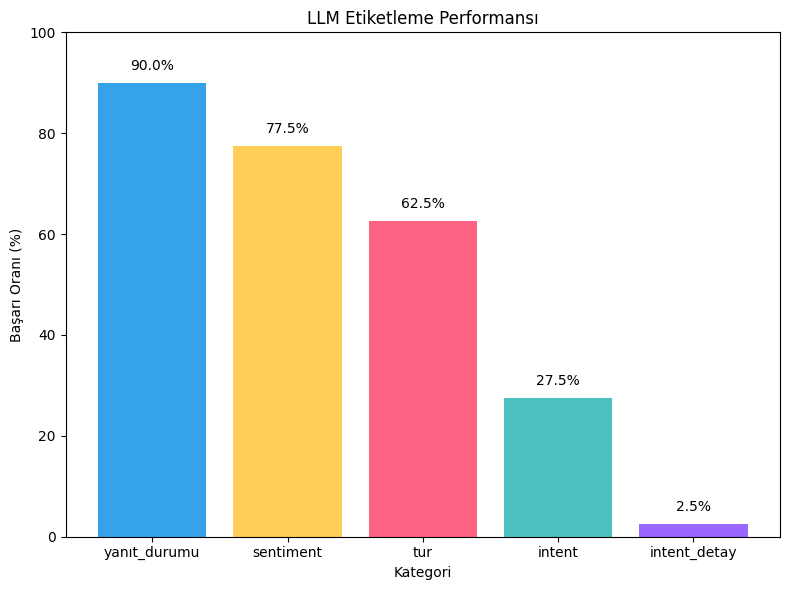

In [22]:
import matplotlib.pyplot as plt


kategoriler = ["yanıt_durumu", "sentiment", "tur","intent","intent_detay"]
basari_oranlari = sonuc

plt.figure(figsize=(8, 6))
bars = plt.bar(
    kategoriler, 
    basari_oranlari, 
    color=["#36A2EB", "#FFCE56", "#FF6384", "#4BC0C0", "#9966FF"]
)
plt.xlabel("Kategori")
plt.ylabel("Başarı Oranı (%)")
plt.title("LLM Etiketleme Performansı")
plt.ylim(0, 100)

# Çubukların üzerine yüzde değerlerini ekle
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.savefig("llm_basari_oranlari.png")
plt.show()

# Başarı oranlarını yazdır

In [84]:
from ast import literal_eval
import csv

# CSV dosyalarını oku
try:
    true_df = pd.read_csv("manuel_labels.csv", quoting=csv.QUOTE_ALL, on_bad_lines="warn")
except FileNotFoundError:
    print("Hata: manuel_labels.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    exit()
except pd.errors.ParserError as e:
    print(f"Hata: CSV ayrıştırma hatası: {e}")
    print("Lütfen manuel_labels_duzeltilmis.csv dosyasını kontrol edin (virgülle ayrılmış, tırnaklarla çevrili metinler).")
    exit()

try:
    llm_predictions_df = pd.read_csv("gpt-5-nano-out1.csv", quoting=csv.QUOTE_ALL, on_bad_lines="warn")
except FileNotFoundError:
    print("Hata: gpt-5-nano-out1.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    exit()
except pd.errors.ParserError as e:
    print(f"Hata: CSV ayrıştırma hatası: {e}")
    print("Lütfen llm_predictions.csv dosyasını kontrol edin (virgülle ayrılmış, tırnaklarla çevrili metinler).")
    exit()

true_df["tum_mesajlar"]=df["tum_mesajlar"]
llm_predictions_df["tum_mesajlar"]=df["tum_mesajlar"]

# Sütun isimlerini kontrol et
print("Doğru veri CSV sütunları:", true_df.columns.tolist())
print("LLM tahmin CSV sütunları:", llm_predictions_df.columns.tolist())

#Gerekli sütunların varlığını kontrol et
required_columns =['sohbet_id', 'ilk_mesaj_tarihi', 'son_mesaj_tarihi', 'konusma_suresi_dakika', 'yanit_durumu', 'sentiment', 'tur', 'intent', 'intent_detay',"tum_mesajlar"]
if not all(col in true_df.columns for col in required_columns):
    print(f"Hata: Doğru veri CSV'sinde gerekli sütunlar eksik. Bulunan sütunlar: {true_df.columns.tolist()}")
    exit()
if not all(col in llm_predictions_df.columns for col in required_columns):
    print(f"Hata: LLM tahmin CSV'sinde gerekli sütunlar eksik. Bulunan sütunlar: {llm_predictions_df.columns.tolist()}")
    exit()


# JSON verisi oluştur
json_data = []
merged = true_df.merge(
    llm_predictions_df,
    on="sohbet_id",  # ortak sütunu seç
    suffixes=("_expected", "_predicted"),
    how="left"
)

# Sonra JSON üretimi
json_data=[]
for _, row in merged.iterrows():
    json_entry = {
    "sohbet_id": row["sohbet_id"], "tum_mesajlar": row["tum_mesajlar_expected"],
    "expected": {
        "yanit_durumu": row["yanit_durumu_expected"],
        "sentiment": row["sentiment_expected"],
        "tur": row["tur_expected"],
        "intent": row["intent_expected"],
        "intent_detay": row["intent_detay_expected"]
    },
    "llm_prediction": {
        "yanit_durumu": row["yanit_durumu_predicted"],
        "sentiment": row["sentiment_predicted"],
        "tur": row["tur_predicted"],
        "intent": row["intent_predicted"],
        "intent_detay": row["intent_detay_predicted"]
    }
}
    json_data.append(json_entry)
    if pd.isna(row["sentiment_predicted"]):
        print(f"Uyarı: {row['konusma']} için LLM tahmini bulunamadı.")

# JSON dosyasına kaydet
with open("llm_karsilastirma.json", "w", encoding="utf-8") as f:
    json.dump(json_data, f, ensure_ascii=False, indent=2)

Doğru veri CSV sütunları: ['sohbet_id', 'ilk_mesaj_tarihi', 'son_mesaj_tarihi', 'konusma_suresi_dakika', 'yanit_durumu', 'sentiment', 'tur', 'intent', 'intent_detay', 'tum_mesajlar']
LLM tahmin CSV sütunları: ['sohbet_id', 'ilk_mesaj_tarihi', 'son_mesaj_tarihi', 'konusma_suresi_dakika', 'yanit_durumu', 'sentiment', 'tur', 'intent', 'intent_detay', 'tum_mesajlar']
